<a href="https://colab.research.google.com/github/AlejandraOchoai-DA/analisis-connectaTel/blob/main/S7_Version_Estudiante_Project_ConnectaTel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel.

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


---
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [ ]:
# importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# cargar archivos
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv')#completa el código
usage = pd.read_csv('/datasets/usage.csv')#completa el código

In [ ]:
# mostrar las primeras 5 filas de plans
plans.head(5)

,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [ ]:
# mostrar las primeras 5 filas de users
users.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [ ]:
# mostrar las primeras 5 filas de usage
usage.head(5)

,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [ ]:
# revisar el número de filas y columnas de cada dataset
print("plans", plans.shape)
print("users", users.shape)
print("usage", usage.shape)

plans (2, 8)
users (4000, 8)
usage (40000, 6)


In [ ]:
# inspección de plans con .info()
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [ ]:
# inspección de users con .info()
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


In [ ]:
# inspección de usage con .info()
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [ ]:
# cantidad de nulos para users
print('valores nulos users', users.isna().sum)# Cantidad de valores nulos)
print('Proporcion valores nulos users', users.isna().mean().sort_values(ascending=False))# Proporción de valores nulos)

valores nulos users <bound method NDFrame._add_numeric_operations.<locals>.sum of       user_id  first_name  last_name    age   city  reg_date   plan  \
0       False       False      False  False  False     False  False   
1       False       False      False  False  False     False  False   
2       False       False      False  False  False     False  False   
3       False       False      False  False  False     False  False   
4       False       False      False  False  False     False  False   
...       ...         ...        ...    ...    ...       ...    ...   
3995    False       False      False  False  False     False  False   
3996    False       False      False  False  False     False  False   
3997    False       False      False  False  False     False  False   
3998    False       False      False  False  False     False  False   
3999    False       False      False  False  False     False  False   

      churn_date  
0           True  
1           True  
2       

In [ ]:
# cantidad de nulos para usage
print('valores nulos usage', usage.isna().sum)
print('Proporcion valores nulos usage', usage.isna().mean().sort_values(ascending=False))

valores nulos usage <bound method NDFrame._add_numeric_operations.<locals>.sum of           id  user_id   type   date  duration  length
0      False    False  False  False     False    True
1      False    False  False  False      True   False
2      False    False  False  False      True   False
3      False    False  False  False     False    True
4      False    False  False  False     False    True
...      ...      ...    ...    ...       ...     ...
39995  False    False  False  False     False    True
39996  False    False  False  False     False    True
39997  False    False  False  False     False    True
39998  False    False  False  False      True   False
39999  False    False  False  False     False    True

[40000 rows x 6 columns]>
Proporcion valores nulos usage duration    0.55190
length      0.44740
date        0.00125
id          0.00000
user_id     0.00000
type        0.00000
dtype: float64


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos.

 **Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción?  
- Indica qué harías: ¿imputar, eliminar, ignorar?

• En el dataset de USERS, tenemos dos casos a evaluar:
- churn_date (88,35%) es el campo con más ausencias. una correccion inicial es pasarlo al formato indicado, ya que esta en object, este podria afectar analisis de segmentacion por fechas, si se continua con un alto porsentaje ignorariamos columna.
- city (11,72%), aunque no es crítico para cálculos operativos, puede afectar análisis de segmentacion demográficos, iniciariamos con una limpieza que podria estar afectando este porcentaje.
    
• En el dataset de USAGE, tenemos tres casos a evaluar:
- Duration (55,19%) Se debe entrar a invistigar los casos, si todos depende directamente del type, si son por text es "normal" el ausente.
- length (44,74%) Se debe entrar a invistigar los casos, si todos depende directamente del type, si son por call es "normal" el ausente.
- date (0,12%) En este caso podemos dejar los nulos, dado que la ausencia es minima y no es una columna esencial que pueda afectar el analisis operativo, aunque se modificara su formato.

### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [ ]:
# explorar columnas numéricas de users
users[["user_id","age"]].describe()


,user_id,age
count,4000.000000,4000.000000
mean,11999.500000,33.739750
std,1154.844867,123.232257
min,10000.000000,-999.000000
25%,10999.750000,32.000000
50%,11999.500000,47.000000
75%,12999.250000,63.000000
max,13999.000000,79.000000


- La columna `user_id` es la identificacion del usuario y no tiene faltantes, no es una columna esencial para un analisis operativo, podemos ver que tiene toda la cronoligia con el minimo que comienza en 10000 y el maximo que termina en 13999.
- La columna `age` no contamos con faltantes, entrariamos a revisar outiliers como el -999 que no es "normal", y el cual debe estar afectando el promedio.

In [ ]:
# explorar columnas categóricas de users
columnas_user = ['city', 'plan']
users[columnas_user].describe()



,city,plan
count,3531,4000
unique,7,2
top,Bogotá,Basico
freq,808,2595


- La columna `city` nos indica 469 faltantes, representando un 11,72%. Tenemos 7 valores unicos, Bogota siendo el mas frecuente.
- La columna `plan` no tenemos faltantes, con 2 unicos typos siendo el Basico con mayor frecuencia.

In [ ]:
# explorar columnas numéricas de usage
usage[['id','user_id', 'duration', 'length']].describe()

,id,user_id,duration,length
count,40000.00000,40000.000000,17924.000000,22104.000000
mean,20000.50000,12002.405975,5.202237,52.127398
std,11547.14972,1157.279564,6.842701,56.611183
min,1.00000,10000.000000,0.000000,0.000000
25%,10000.75000,10996.000000,1.437500,37.000000
50%,20000.50000,12013.000000,3.500000,50.000000
75%,30000.25000,13005.000000,6.990000,64.000000
max,40000.00000,13999.000000,120.000000,1490.000000


- Las columnas `id` y `user_id` no tenemos faltantes, corresponden a una numeracion de las filas e identificacion de usuarios acorde segun su minimo y maximo.
- Las columnas `duration` y `length` tienen falntantes de 55,19% Y 44,79% respectivamente, debemos entrar a investigar sin son faltantes relacionados con el type.

In [ ]:
# explorar columna categórica de usage
usage['type'].describe()# completa el código

count     40000
unique        2
top        text
freq      22092
Name: type, dtype: object

- La columna `type` no tenemos faltantes, dos valores categoricos unicos, siendo texto el de mayor frecuencia.


---
✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso.

**Valores inválidos o sentinels**  
- ¿En qué columnas encontraste valores inválidos o sentinels?  
- ¿Qué acción tomarías?

 **En resumen de primeros hallazgos**
 - En el DF de users, la columna age aunque no tenemos faltantes, entrariamos a revisar outiliers como el -999 que no es un valor invalido y el cual debe estar afectando el promedio.
 - En el DF users, la columna city nos indica 469 faltantes, representando un 11,72%, revisarimos que podria estar pasando para saber si podemos imputar o ignorar.
 - En el DF usage, las columnas duration y length tienen falntantes de 55,19% Y 44,79% respectivamente, debemos entrar a investigar sin son faltantes relacionados con el type para saber que accion tomar.
 - Modificar date(DF usage) y churn_datev(DF users), al formato correspondiente a fecha.


### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [ ]:
# Convertir a fecha la columna `reg_date` de users
users['reg_date'] = pd.to_datetime(users['reg_date']) # completa el código

In [ ]:
# Convertir a fecha la columna `date` de usage
usage['date'] = pd.to_datetime(usage['date'])# completa el código

In [ ]:
# Revisar los años presentes en `reg_date` de users
users['reg_date'].dt.year.value_counts()

2024    1330
2023    1316
2022    1314
2026      40
Name: reg_date, dtype: int64

En `reg_date`, tiene 40 datos del año 2026, que no deberia estar pues el DF es hasta el 2024.

In [ ]:
# Revisar los años presentes en `date` de usage
usage['date'].dt.year.value_counts()

2024.0    39950
Name: date, dtype: int64

En `date`, tenemos 50 fechas faltantes.
Basaremos el análisis en estas fechas.

✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:

**Fechas fuera de rango**  
- ¿Aparecen años imposibles? (años muy viejos o sin transcurrir al momento de guardar los datos)
- ¿Qué harías con ellas?

---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [ ]:
# Reemplazar -999 por la mediana de age
age_mediana = users['age'].median()
users['age'] = users['age'].replace(-999, age_mediana)

# Verificar cambios
users['age'].describe()

count    4000.000000
mean       48.122250
std        17.690408
min        18.000000
25%        33.000000
50%        47.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64

In [ ]:
# Reemplazar ? por NA en city
users['city'] = users['city'].replace("?", pd.NA)

# Verificar cambios
users['city'].describe()

count       3435
unique         6
top       Bogotá
freq         808
Name: city, dtype: object

In [ ]:
# Marcar fechas futuras como NA para reg_date
users.loc[users['reg_date'].dt.year >= 2026, 'reg_date']= pd.NaT

# Verificar cambios
users['reg_date'].dt.year.value_counts().sort_index()

2022.0    1314
2023.0    1316
2024.0    1330
Name: reg_date, dtype: int64

### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [ ]:
# Verificación MAR en usage (Missing At Random) para duration
print("Missing en duration por tipo:")
usage['duration'].isna().groupby(usage['type']).mean()

Missing en duration por tipo:


type
call    0.000000
text    0.999276
Name: duration, dtype: float64

In [ ]:
# Verificación MAR en usage (Missing At Random) para length
print("Missing en lenght por tipo:")
usage['length'].isna().groupby(usage['type']).mean()

Missing en lenght por tipo:


type
call    0.99933
text    0.00000
Name: length, dtype: float64

Las columnas `duration` y `length`del DF usage, si dependen directamente del `type`, por lo tanto los dejamos como nulos.

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico.

**Instrucciones:**:
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [ ]:

# Columnas auxiliares
usage["is_text"] = (usage["type"] == "text").astype(int) #conocer el total de mensajes
usage["is_call"] = (usage["type"] == "call").astype(int) #conocer el total de llamadas


# Agrupar información por usuario

usage_agg = usage.groupby('user_id').agg({
    "is_text": 'sum',
    "is_call": 'sum',
    "duration": 'sum',
}).reset_index()


# observar resultado
usage_agg.head(3)


,user_id,is_text,is_call,duration
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [ ]:

# Renombrar columnas
usage_agg=usage_agg.rename(columns={"is_text":"cant_mensajes","is_call":"cant_llamadas", "duration":"cant_minutos_llamada"})

# observar resultado
usage_agg.head(3)

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [ ]:
# Combinar la tabla agregada con el dataset de usuarios

user_profile = pd.merge(users,usage_agg, on='user_id', how='left')
user_profile.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [ ]:
# Resumen estadístico de las columnas numéricas
user_profile[['age','cant_mensajes','cant_llamadas','cant_minutos_llamada']].describe()


,age,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,4000.000000,3999.000000,3999.000000,3999.000000
mean,48.122250,5.524381,4.478120,23.317054
std,17.690408,2.358416,2.144238,18.168095
min,18.000000,0.000000,0.000000,0.000000
25%,33.000000,4.000000,3.000000,11.120000
50%,47.000000,5.000000,4.000000,19.780000
75%,63.000000,7.000000,6.000000,31.415000
max,79.000000,17.000000,15.000000,155.690000


In [ ]:
# Distribución porcentual del tipo de plan
user_profile['plan'].value_counts(normalize=True)


Basico     0.64875
Premium    0.35125
Name: plan, dtype: float64

---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada`

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda)

**Hint**  
Para cada histograma,
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

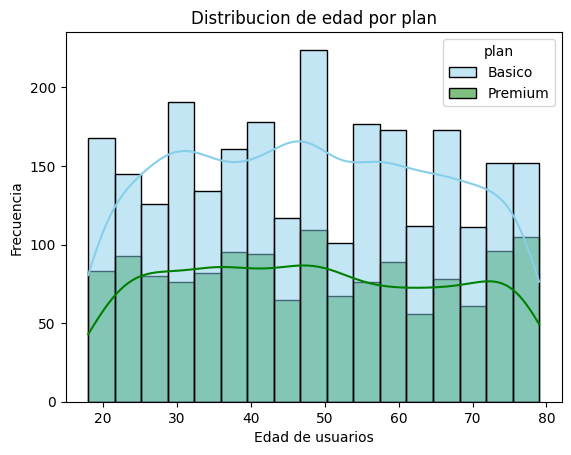

In [ ]:
# Histograma para visualizar la edad (age)

sns.histplot(data=user_profile, x='age', hue='plan', palette=['skyblue','green'], kde=True )
plt.xlabel('Edad de usuarios')
plt.ylabel('Frecuencia')
plt.title('Distribucion de edad por plan')
plt.show()



💡Insights:
- Distribucion multimodal, no esta sesgada para ningun lado, ni es simetrica. Tenemos varios picos, dominando uno entre 40 y 50 años, en relacion con los planes se puede observar una preferencia en el Premium para los mayores de 70, en general la proporcion es mas alta en basico, con varios picos.


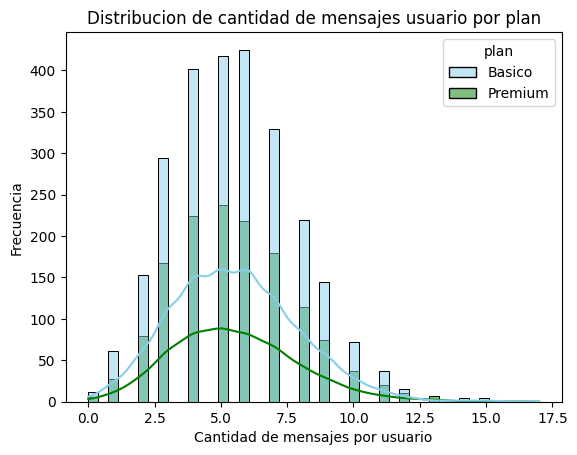

In [ ]:
# Histograma para visualizar la cant_mensajes
sns.histplot(data=user_profile, x='cant_mensajes', hue='plan', palette=['skyblue','green'],kde=True )
plt.xlabel('Cantidad de mensajes por usuario')
plt.ylabel('Frecuencia')
plt.title('Distribucion de cantidad de mensajes usuario por plan')
plt.show()



💡Insights:
- Distribucion simetrica, ligera preferencia en el plan basico segun cantidad de mensajes.


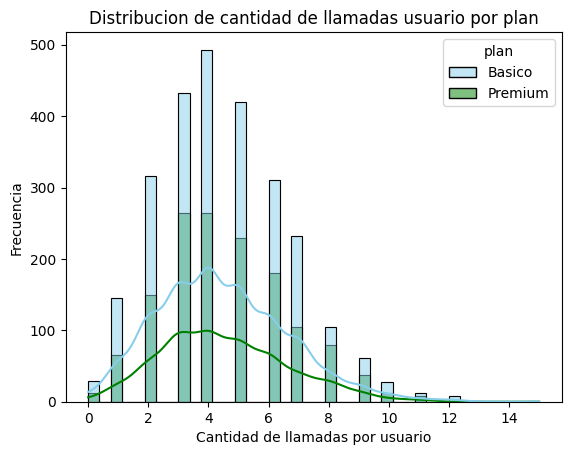

In [ ]:
# Histograma para visualizar la cant_llamadas
sns.histplot(data=user_profile, x='cant_llamadas', hue='plan', palette=['skyblue','green'],kde=True )
plt.xlabel('Cantidad de llamadas por usuario')
plt.ylabel('Frecuencia')
plt.title('Distribucion de cantidad de llamadas usuario por plan')
plt.show()



💡Insights:
- Distribución con un ligero sesgo a la derecha, continaudo como preferencia el plan basico, segun la cantidad de llamadas por usuario.

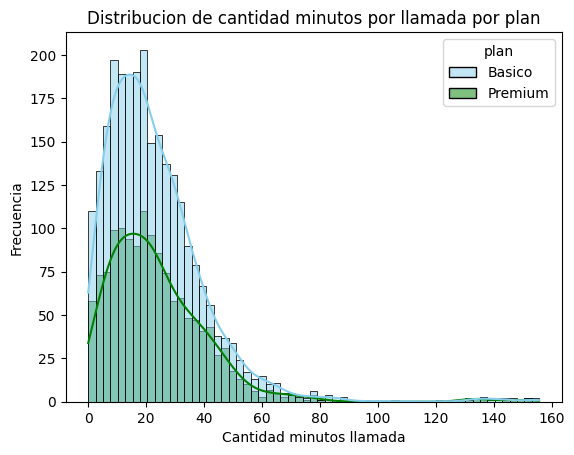

In [ ]:
# Histograma para visualizar la cant_minutos_llamada
sns.histplot(data=user_profile, x='cant_minutos_llamada', hue='plan', palette=['skyblue','green'], kde=True)
plt.xlabel('Cantidad minutos llamada')
plt.ylabel('Frecuencia')
plt.title('Distribucion de cantidad minutos por llamada por plan')
plt.show()



💡Insights:
- Distribución con sesgo a la derecha, preferencia notable en el plan basico, segun la cantidad de minutos de llamada por usuario.

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age`
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

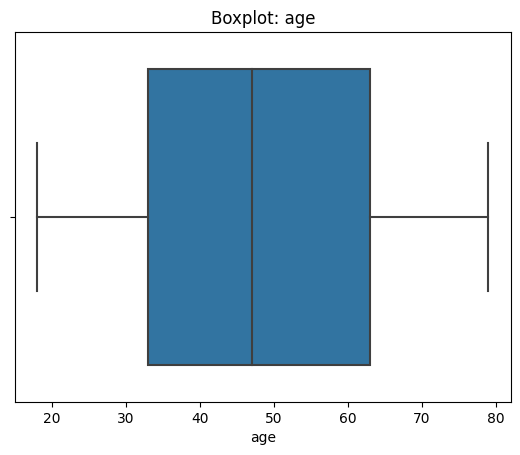

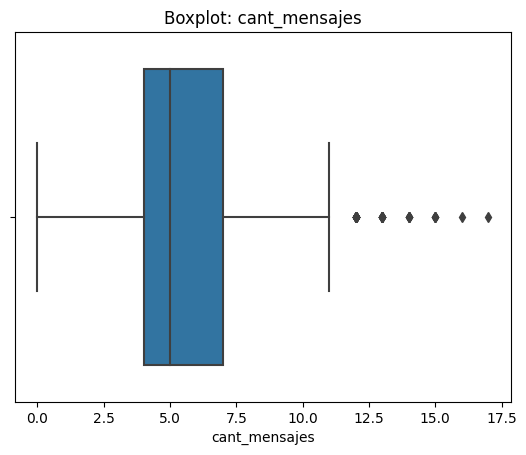

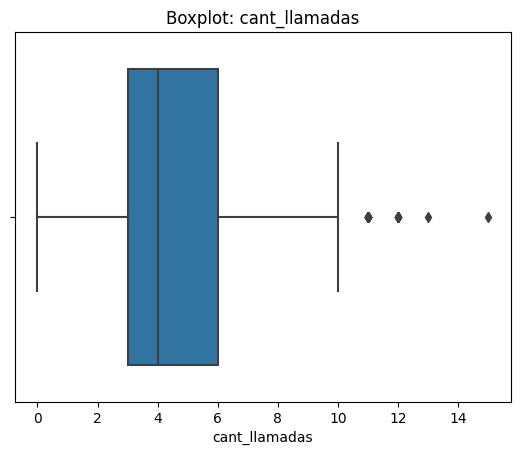

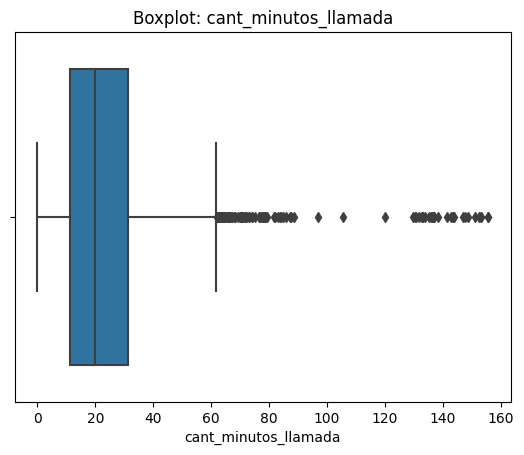

In [ ]:
# Visualizando usando BoxPlot
columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for col in columnas_numericas:
    sns.boxplot(data=user_profile, x=col)
    plt.title(f'Boxplot: {col}')
    plt.show()

💡Insights:
- Age: No presneta Outliers.
- cant_mensajes: Presenta pocos Outliers.
- cant_llamadas: Presenta pocos Outliers.
- cant_minutos_llamada: Presenta bastantes Outliers.

In [ ]:

# Calcular límites con el método IQR
columnas_limites = ['cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']
limites_IQR={}

for col in columnas_limites:
    Q1 =user_profile[col].quantile(0.25)
    Q3 =user_profile[col].quantile(0.75)
    IQR= Q3-Q1

    lower = Q1- 1.5 * IQR
    upper= Q3 + 1.5 * IQR

    limites_IQR[col] = {'lower' : lower, 'upper':upper}

    print (f" la {col} tiene lower {lower} y upper {upper}")


 la cant_mensajes tiene lower -0.5 y upper 11.5
 la cant_llamadas tiene lower -1.5 y upper 10.5
 la cant_minutos_llamada tiene lower -19.322500000000005 y upper 61.8575


In [ ]:
# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no
user_profile[columnas_limites].describe()

,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,3999.000000,3999.000000,3999.000000
mean,5.524381,4.478120,23.317054
std,2.358416,2.144238,18.168095
min,0.000000,0.000000,0.000000
25%,4.000000,3.000000,11.120000
50%,5.000000,4.000000,19.780000
75%,7.000000,6.000000,31.415000
max,17.000000,15.000000,155.690000


💡Insights:
- cant_mensajes: Mantener, puede haber usuarios con 17 mensajes al dia, no es un comportamiento inusual.
- cant_llamadas: Mantener, puede haber usuarios con 15 llamadas al dia, no es un comportamiento inusual.
- cant_minutos_llamada: Outliers, por lo que sustituiremos con el metodo de winsorizacion.

---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [ ]:



def grupo_uso(mensajes, llamadas):
    if (mensajes < 5) and (llamadas < 5):
        return "Bajo uso"
    elif (mensajes < 10) and (llamadas < 10):
        return "Uso medio"
    else:
        return "Alto uso"

user_profile['grupo_uso'] = user_profile.apply(
    lambda row: grupo_uso(row['cant_mensajes'], row['cant_llamadas']),
    axis=1
)





In [ ]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Uso medio
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Alto uso
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Uso medio
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Alto uso
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Bajo uso


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [ ]:
# Crear columna grupo_edad

def grupo_edad(edad):
    if (edad < 30):
        return "Joven"
    elif (edad < 60):
        return "Adulto"
    else:
        return "Adulto Mayor"

user_profile['grupo_edad'] = user_profile.apply(
    lambda row: grupo_edad(row['age']),
    axis=1
)




In [ ]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso,grupo_edad
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Uso medio,Adulto
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Alto uso,Adulto
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Uso medio,Adulto
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Alto uso,Adulto Mayor
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Bajo uso,Adulto Mayor


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

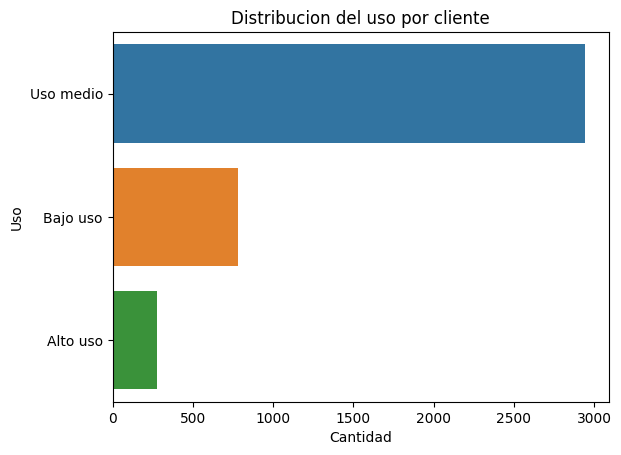

In [ ]:
# Visualización de los segmentos por uso
sns.countplot(data=user_profile, y='grupo_uso', order=user_profile['grupo_uso'].value_counts().index)
plt.ylabel ('Uso')
plt.xlabel ('Cantidad')
plt.title('Distribucion del uso por cliente')
plt.show()

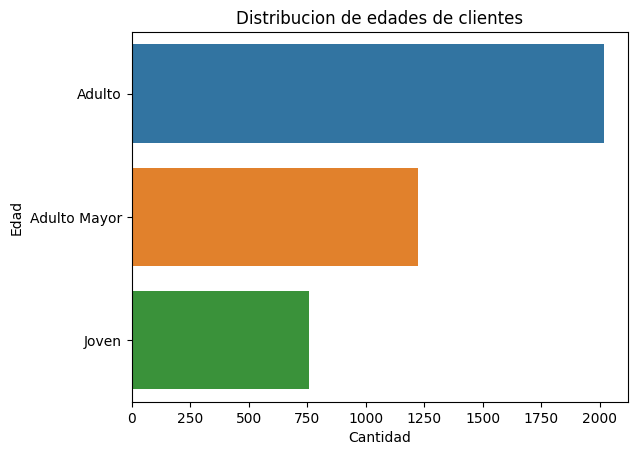

In [ ]:
# Visualización de los segmentos por edad
sns.countplot(data=user_profile, y='grupo_edad', order=user_profile['grupo_edad'].value_counts().index)
plt.ylabel ('Edad')
plt.xlabel ('Cantidad')
plt.title('Distribucion de edades de clientes')
plt.show()


---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:**
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?


- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?  
- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?  
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?


- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?

✍️ **Escribe aquí tu análisis ejecutivo:**

### Análisis ejecutivo

⚠️ **Problemas detectados en los datos**
- Encontramos un dataset con formatos de fecha no correspondientes y fechas futuras (2026).
- Antes de consolidar el dataset final, dentro de las tablas encontramos el siguiente porcentaje de ausencias: churn_date  con 88,35%, city con 11,72%, date con 0,12%,  duration con 55,19% y length estos dos últimos se revisaron y se concluye que es una variable dependiente a que type sea, por lo tanto lo mantenemos.

🔍 **Segmentos por Edad**
- Distribución multimodal, no está sesgada para ningún lado, ni es simétrica. Tenemos varios picos, dominando uno entre 40 y 50 años, en relación con los planes se puede observar una preferencia en el Premium para los mayores de 70, en general la proporción es más alta en básico, con varios picos.
- No presenta Outliers.
- Se puede observar que tenemos que nuestro grupo de cliente está en edad Adulta es decir entre 30 y 60 anos.

📊 **Segmentos por Nivel de Uso**
- Tenemos una distribución simétrica, ligera preferencia en el plan básico según cantidad de mensajes, para la cantidad de llamadas la distribución tiene un ligero sesgo a la derecha con preferencia igualmente el plan básico, finalmente según la cantidad de minutos de llamada por usuario la distribución es con sesgo a la derecha, preferencia notable en el plan básico.
- Para el segmento por nivel de uso, predomina un USO MEDIO, entendiendo que la mayoría de nuestros clientes entren en un grupo entre menos de 10 mensajes y de 10 llamadas.

➡️ Esto sugiere que ...

- En relacion con los Outliers para la cant_mensajes y cant_llamadas se deberian mantener dadod que los valores no son tan elevados, usuarios con 17 mensajes al dia y usuarios con 15 llamadas al dia pueden ser un comportamiento usual; de lo contrario cant_minutos_llamada se sugiere sustituir con el metodo de winsorizacion.

💡 **Recomendaciones**
- Para analisis con churn_date el cual cuenta con 88,35%, de faltantes, se recomienda pasarlo al formato indicado, ya que está en object, y revisar si hay outliers o que otra accion puede estar afectando.


---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---



### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`